# Project Admit - Part 1

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [3]:
%pwd

u'/Users/Geraldine/Documents/Data Science Projects/Admit'

## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400, but some missing data, after we remove missing data, we'll have 397 observations to work with.

#### Question 2. Create a summary table

In [5]:
df_raw.describe()

/Users/Geraldine/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE is scored on a larger scale than GPA, so there's a higher potential for values to be more spread out.

#### Question 4. Drop data points with missing data


In [6]:
df_clean = df_raw[(df_raw.gre >= 0) & (df_raw.gpa >= 0) & (df_raw.prestige >= 0)]

In [7]:
df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [8]:
df_clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [9]:
# frequency table cutting presitge and whether or not someone was admitted
print pd.crosstab(df_clean['admit'], df_clean['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


In [10]:
#Alternatively:
#df = df_raw.dropna() 

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: df_raw contained 400 observations, and df_clean contained 397 observations. a total of 3 rows were removed which contained gre, gpa, or prestive values not >= 0. null_data tells us the three rows that were removed from df_raw and clean_data confirms that df_clean does not contain rows with missing values.

In [11]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [12]:
df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [13]:
null_data = df_raw[df_raw.isnull().any(axis=1)]
print null_data

     admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN


In [14]:
#double check
clean_data = df_clean[df_clean.isnull().any(axis=1)]
print clean_data

Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


#### Question 6. Create box plots for GRE and GPA

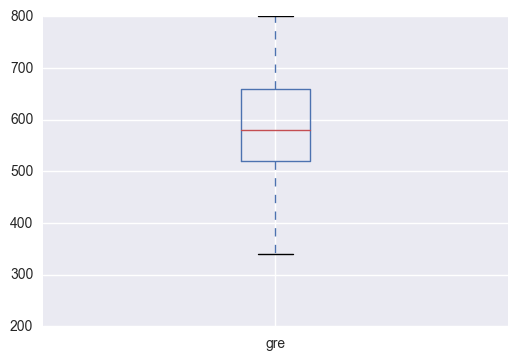

In [15]:
df_clean['gre'].plot(kind='box')

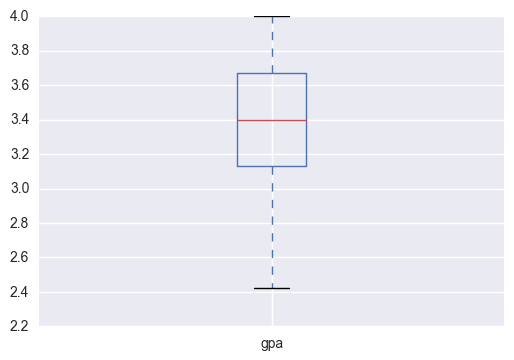

In [16]:
df_clean['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: It basically plots the stats from .describe(). The red line is the median. The blue box represents the IQR (1st quartile at the bottom, and 3rd quartile at the top). The black bars are min/max values that are "appropriate" for the data set (not the absolute min/max). The plus signs are any outliers.

#### Question 8. Describe each distribution 

https://github.com/justmarkham/DAT8/blob/master/notebooks/05_pandas_visualization.ipynb

/Users/Geraldine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


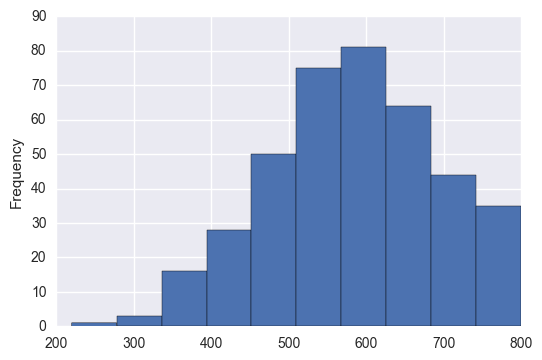

In [17]:
df_clean.gre.order().values
df_clean.gre.plot(kind='hist', bins=10)

/Users/Geraldine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


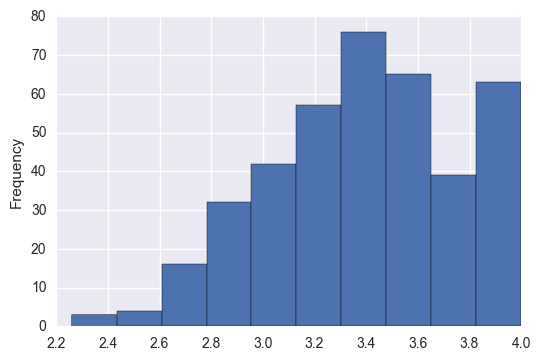

In [18]:
df_clean.gpa.order().values
df_clean.gpa.plot(kind='hist', bins=10)

/Users/Geraldine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


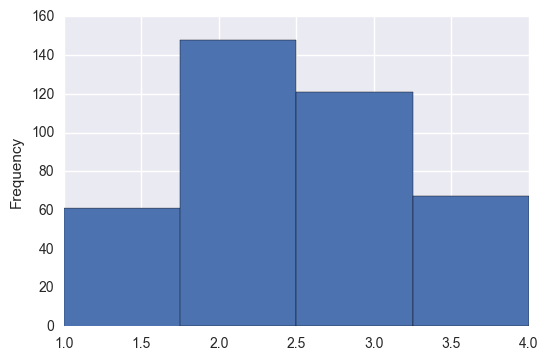

In [19]:
df_clean.prestige.order().values
df_clean.prestige.plot(kind='hist', bins=4)

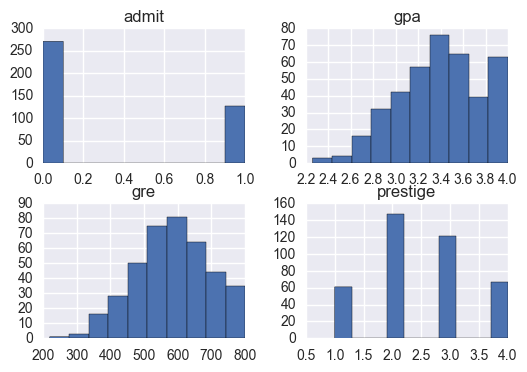

In [20]:
# easier way to check all variables at the same time
df_clean.hist()
pl.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: For the most part **yes** by looking at the histogram (although gre & gpa have a slight left tail, this data makes sense). We also have a large sample size ~400 and mean is relatively close to the median.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: if it's not normal, ex: gre looks like it has a slight left tail, you can correct it using log or e

#### Question 11. Which of our variables are potentially colinear? 

In [21]:
df_clean[['gre', 'gpa', 'prestige']].corr()

,gre,gpa,prestige
gre,1.000000,0.382408,-0.124533
gpa,0.382408,1.000000,-0.060976
prestige,-0.124533,-0.060976,1.000000


               gre       gpa  prestige
gre       1.000000  0.382408 -0.124533
gpa       0.382408  1.000000 -0.060976
prestige -0.124533 -0.060976  1.000000
Axes(0.125,0.125;0.62x0.775)


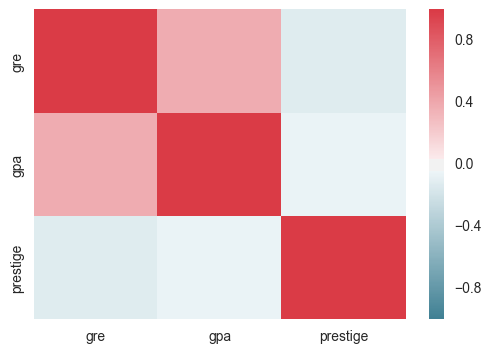

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_clean[['gre', 'gpa', 'prestige']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

#### Question 12. What did you find?

Answer: gpa & gre could be potentially colinear (althought .38 is pretty low risk). 
If they are colinear, then including both of these fields in a model could introduce a pain point of multicollinearity, where it's more difficult for a model to determine which feature is effecting the predicted value.

#### Question 13. What is your hypothesis? 

Answer: the probability of being accepted into a graduate program is higher for students who attended a top ranked undergraduate college (prestige_1==True) as opposed to a lower ranked school with, say, prestige_4==True (remember, a prestige of 1 is the most prestigious and a prestige of 4 is the least prestigious.